
#Практическая работа №1: Краевая задача для уравнения II-го порядка.
Выполнила студентка гр. 9382 Балаева Милана, вариант 19.


#Цель работы
Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

Задaча Коши состоит в нахождении решения дифференциального уравнения, удовлетворяющего так называемым начальным условиям.
<br>Система ОДУ n-го порядка:
\begin{cases}
   y^{(n)} = f(x, y, ..., y^{(n-1)}) \\
   y(x_0) = y_{01} \\
   ... \\
   y^{(n-1)}(x_0) = y_{0n}
 \end{cases}
 
 
Краевая задача — задача о нахождении решения заданного дифференциального уравнения, удовлетворяющего краевым условиям в концах интервала или на границе области.

## Постановка задачи

Рассматривается следующая краевая задача. 

Дано уравнение: $y''=f(x,y),a<x<b$ (1)

и граничные условия $y(a)= y_a,y(b)= y_b$ (2)

Требуется найти решение задачи (1)-(2) и построить его график. 
Рассмотрим задачу Коши для уравнения (1) с начальными условиями $$y(a)= y_a,y'(a)=h (3)$$
План решения основан на многократном решении задачи Коши (1), (3).  Значение решения задачи Коши при $x=b$ является функцией  от $h$.

Задача сводится к отысканию такого значения переменной $h$, при котором выполнено условие на правом конце отрезка, т.е.  должно выполняться $$y(b,h)= y_b, (4)$$
Это уравнение с одним неизвестным $h$.  

Для решения уравнения (4) можно применить обычный метод половинного деления.

## Выполнение работы

$$a= 0, b = 2$$
$$f(x,y)= \sqrt{y(x^2+1)}$$
$$y_a = 3, y_b = 4$$

$y'' = \sqrt{yx+2)}$ при $0 < x < 2$ $$y(0) = y_0 = 3, y(2) = y_2 = 4$$
Рассмотрим задачу Коши для нашего уравнения с начальными условиями $$ y(0) = 3, y'(0) = h$$
Ищем зависимость между $y'$ и $y$ в виде $y'= p(y)$, где $p(y)$ - неизвестная функция.
Тогда исходная задача примет вид
$$p' = \sqrt{yx+2)})$$
В терминах задачи коши, данныем будут выглядеть:
$$\begin{cases}
   y'' = \sqrt{2+xy} \\ 
   y(0) = 3 \\
   y'(0) = h
 \end{cases}$$

Предположим, что  числа $h_0 = 1, \Delta h = 4$ и решим численно дифферециальное уравнение.

In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_bvp, solve_ivp
import numpy as np

In [2]:
a, b, y_a, y_b, h, delta  = 0, 2, 3, 4, 1, 4
x = np.arange(a, b, 0.001)

In [3]:
def f(x,y):
    return [y [1],(2+ y[0]*x )**(0.5)]
 
y = odeint(f, [y_a, h], np.linspace(a, b, 1000), tfirst=True)[-1][0]
while abs(y - y_b) > 0.001:
    if (odeint(f, [y_a, h - delta], np.linspace(a, b, 1000), tfirst=True)[-1][0] - y_b)*(y - y_b) < 0:
         h = h - delta + delta/2
    elif (odeint(f, [y_a, h + delta], np.linspace(a, b, 1000), tfirst=True)[-1][0] - y_b)*(y - y_b) < 0:
        h = h + delta - delta/2
    else:
        print("Решений нет")
        break    
    delta /= 2
    y = odeint(f, [y_a, h], np.linspace(a, b, 1000), tfirst=True)[-1][0]
print('h = ', h, 'y = ', y,'delta_h = ', delta)
       

h =  -1.40966796875 y =  4.000042449589234 delta_h =  0.00048828125


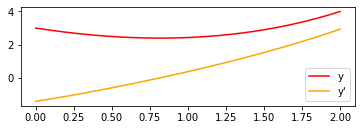

In [5]:
plt.subplot(211)
y_1, = plt.plot(np.linspace(a,b,1000),odeint(f, [y_a, h], np.linspace(a, b, 1000), tfirst=True)[:,0],label='y', color = "red")
y_1_1, = plt.plot(np.linspace(a,b,1000),odeint(f, [y_a, h], np.linspace(a, b, 1000), tfirst=True)[:,1],label='y‘', color= "orange")             
plt.legend(handles=[y_1,y_1_1])
plt.show()
    

h = -1.40966796875 , y =  4.000042449589234

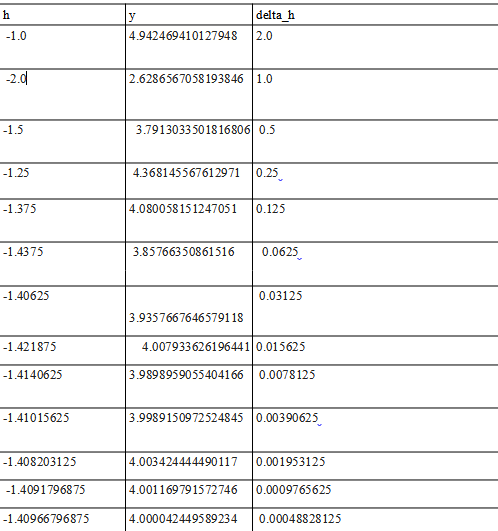

##Вывод.
В ходе выполнения работы была решена краевая задача для уравнения II-го порядка путём многократного решения задачи Коши.